# Data Wrangling and Regression


In [32]:
#IPython is what you are using now to run the notebook
import IPython
print "IPython version:      %6.6s (need at least 1.0)" % IPython.__version__

# Numpy is a library for working with Arrays
import numpy as np
print "Numpy version:        %6.6s (need at least 1.7.1)" % np.__version__

# SciPy implements many different numerical algorithms
import scipy as sp
print "SciPy version:        %6.6s (need at least 0.12.0)" % sp.__version__

# Pandas makes working with data tables easier
import pandas as pd
print "Pandas version:       %6.6s (need at least 0.11.0)" % pd.__version__

# Module for plotting
import matplotlib
print "Mapltolib version:    %6.6s (need at least 1.2.1)" % matplotlib.__version__

# SciKit Learn implements several Machine Learning algorithms
import sklearn
print "Scikit-Learn version: %6.6s (need at least 0.13.1)" % sklearn.__version__

IPython version:       4.0.1 (need at least 1.0)
Numpy version:        1.10.1 (need at least 1.7.1)
SciPy version:        0.16.0 (need at least 0.12.0)
Pandas version:       0.17.1 (need at least 0.11.0)
Mapltolib version:     1.5.0 (need at least 1.2.1)
Scikit-Learn version:   0.17 (need at least 0.13.1)


#### Instructions: 
In this problem set you will perform a basic exploratory analysis on an example dataset, bringing to bear all of your new skills in data manipulation and visualization. You will be required to submit well commented python code, documenting all code used in this problem set, along with a write up answering all questions below. Use figures as appropriate to support your answers, and when required by the problem. 
This data set uses the NYCFlights13 dataset. You can download the dataset from canvas.

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import DataFrame

In [34]:
flights_df= pd.read_csv('flights.csv')

In [35]:
print flights_df.shape
print flights_df.columns
print flights_df.dtypes

(336776, 17)
Index([u'Unnamed: 0', u'year', u'month', u'day', u'dep_time', u'dep_delay',
       u'arr_time', u'arr_delay', u'carrier', u'tailnum', u'flight', u'origin',
       u'dest', u'air_time', u'distance', u'hour', u'minute'],
      dtype='object')
Unnamed: 0      int64
year            int64
month           int64
day             int64
dep_time      float64
dep_delay     float64
arr_time      float64
arr_delay     float64
carrier        object
tailnum        object
flight          int64
origin         object
dest           object
air_time      float64
distance        int64
hour          float64
minute        float64
dtype: object


In [36]:
flights_df.dest.unique()
flights_df.head(10)

,Unnamed: 0,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
0,1,2013,1,1,517,2,830,11,UA,N14228,1545,EWR,IAH,227,1400,5,17
1,2,2013,1,1,533,4,850,20,UA,N24211,1714,LGA,IAH,227,1416,5,33
2,3,2013,1,1,542,2,923,33,AA,N619AA,1141,JFK,MIA,160,1089,5,42
3,4,2013,1,1,544,-1,1004,-18,B6,N804JB,725,JFK,BQN,183,1576,5,44
4,5,2013,1,1,554,-6,812,-25,DL,N668DN,461,LGA,ATL,116,762,5,54
5,6,2013,1,1,554,-4,740,12,UA,N39463,1696,EWR,ORD,150,719,5,54
6,7,2013,1,1,555,-5,913,19,B6,N516JB,507,EWR,FLL,158,1065,5,55
7,8,2013,1,1,557,-3,709,-14,EV,N829AS,5708,LGA,IAD,53,229,5,57
8,9,2013,1,1,557,-3,838,-8,B6,N593JB,79,JFK,MCO,140,944,5,57
9,10,2013,1,1,558,-2,753,8,AA,N3ALAA,301,LGA,ORD,138,733,5,58


### Data Wrangling

Let’s explore flights from NYC to Seattle. Use the flights dataset to answer the following questions.

(a) How many flights were there from NYC airports to Seattle in 2013?

In [37]:
# Filtering rows with destination as Seattle
SEA_flights = flights_df[flights_df['dest']=='SEA']
# Number of flights from NYC to SEA
len(SEA_flights.index)

3923

There were 3923 flights from NYC to SEA in 2013.

(b) How many airlines fly from NYC to Seattle?

In [38]:
# Number of airlines
pd.unique(SEA_flights.carrier.ravel()).size

5

There are 5 distinct airlines from NYC to Seattle.

(c) How many unique air planes fly from NYC to Seattle?

In [39]:
# Unique airplanes
pd.unique(SEA_flights.tailnum.ravel()).size

936

There are 936 unique airplanes from NYC to Seattle.

(d) What is the average arrival delay for flights from NYC to Seattle?

In [40]:
# Average arrival delay
SEA_flights['arr_delay'].mean()

-1.0990990990990992

 The average arrival delay for flights from NYC to Seattle is -1.099.

(e) What proportion of flights to Seattle come from each NYC airport?

In [41]:
# Number of 
SEA_flights['origin'].groupby(SEA_flights['origin']).count()

origin
EWR    1831
JFK    2092
dtype: int64

About 46.67% to flights to Seattle come from EWR airport and 53.32% of flights come from JFK airport.

### Data Analysis

Flights are often delayed. Consider the following questions exploring delay patterns.

(a) Which date has the largest average departure delay? Which date has the largest average arrival delay?

In [42]:
# Including only flights with positive delay
avg_dep_delay = flights_df[flights_df['dep_delay']>0]
# Date with largest average departure delay
avg_dep_delay.groupby(['day','month']).mean().sort_values(by='dep_delay',ascending=False).head(n=1)

,,Unnamed: 0,year,dep_time,dep_delay,arr_time,arr_delay,flight,air_time,distance,hour,minute
day,month,,,,,,,,,,,
8,3,143213.777948,2013,1502.488515,102.903522,1541.917305,101.607963,1687.222052,150.228178,1081.352221,14.738132,28.675345


In [43]:
# Including only flights with positive delay
avg_arr_delay = flights_df[flights_df['arr_delay']>0]
# Date with largest average arrival delay
avg_arr_delay.groupby(['day','month']).mean().sort_values(by='arr_delay',ascending=False).head(n=1)

,,Unnamed: 0,year,dep_time,dep_delay,arr_time,arr_delay,flight,air_time,distance,hour,minute
day,month,,,,,,,,,,,
10,7,259200.202783,2013,1534.888668,87.7833,1344.916501,110.093439,1788.904573,161.254473,1142.854871,15.049702,29.918489


Since we are taking the average delays, it makes sense to only use positive delays. The date with the largest average depature delay is March 8th 2013 and the date with largest average arrival delay is July 10th 2013.

(b) What was the worst day to fly out of NYC in 2013 if you dislike delayed flights?


In [44]:
# Including only flights with positive delay
max_dep_delay = flights_df[flights_df['dep_delay']>0]
# Date with largest departure delay
max_dep_delay.groupby(['day','month']).sum().sort_values(by='dep_delay',ascending=False).head(n=1)

,,Unnamed: 0,year,dep_time,dep_delay,arr_time,arr_delay,flight,air_time,distance,hour,minute
day,month,,,,,,,,,,,
8,3,93518597,1314489,981125,67196,1006872,66350,1101756,98099,706123,9624,18725


In [45]:
# Including only flights with positive delay
max_arr_delay = flights_df[flights_df['arr_delay']>0]
# Date with largest arrival delay
max_arr_delay.groupby(['day','month']).sum().sort_values(by='arr_delay',ascending=False).head(n=1)

,,Unnamed: 0,year,dep_time,dep_delay,arr_time,arr_delay,flight,air_time,distance,hour,minute
day,month,,,,,,,,,,,
8,3,102370014,1439295,1006260,66595,1056725,69702,1195383,108854,779958,9850,21260


Here also we have only considered positive delays. The date with the largest arrival and departure delays is March 8th 2013.

(c) Are there any seasonal patterns in departure delays for flights from NYC?

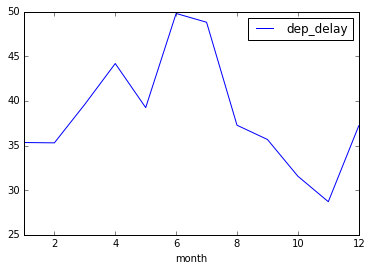

In [46]:
# For plotting inline
%matplotlib inline
# Grouping the positive departure delays by month
dep_delay_by_month = avg_dep_delay[['month','dep_delay']].groupby('month').mean()
# Plotting
dep_delay_by_month.plot()
plt.show()

The average departure delay is maximum in Summer (June and July) and minimum in Fall (Sep, Oct and Nov). The departure delays start increasing from Dec (winter) onwards. Hence there is evidence of seasonal patterns in the departure delays. The seasonality could be caused due to the increased number of travellers in Summer holidays.

(d) On average, how do departure delays vary over the course of a day?

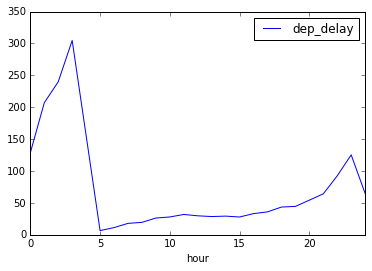

In [47]:
# For plotting inline
%matplotlib inline
# Grouping the positive departure delays by month
dep_delay_by_hour = avg_dep_delay[['hour','dep_delay']].groupby('hour').mean()
# Plotting
dep_delay_by_hour.plot()
plt.show()

The departure delays increase rapidly from 12 am to 4 am. After the departure delays peak at 4 am, then it is a steep decline at 5 am. From 5 am onwards till about the 11 pm, the departure delays are slowly increasing. This variation in departure delays could be due to the fact that some of the aiports close from 12 am to 5 am or they maybe have reduced service.

(e) Which flight departing NYC in 2013 flew the fastest?

In [48]:
# Calculating speed for each flight
speed_df = flights_df['distance']/flights_df['air_time']
# Adding speed as one of the columns of flights dataframe
flights_df['speed'] = pd.Series(speed_df, index=flights_df.index)
# Filtering the flights that flew the fastest
flights_df.sort_values(by='speed',ascending=False).head(n=1)

,Unnamed: 0,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute,speed
216447,216448,2013,5,25,1709,9,1923,-14,DL,N666DN,1499,LGA,ATL,65,762,17,9,11.723077


The flight with flight number 1499 and tailnum as N666DN that flew on May 25th 2013 from LGA to ATL, was the fastest flight departing from NYC in 2013.

(f) Which flights (i.e. carrier + flight + dest) happen every day? Where do they fly to?

In [49]:
# Calculating frequency of flights
freq = flights_df[['carrier','flight','dest','Unnamed: 0']].groupby(['carrier','flight','dest']).count()
# Renaming the aggregated groupby column
freq.columns = ['count']
# Filtering flights which fly everyday
everyday = freq[freq['count']==365]
everyday

count
carrier flight dest       
AA      59     SFO     365
        119    LAX     365
        181    LAX     365
        1357   SJU     365
        1611   MIA     365
B6      219    CLT     365
        359    BUR     365
        371    FLL     365
        431    SRQ     365
        703    SJU     365
        1783   MCO     365
DL      2159   MCO     365
        2391   TPA     365
EV      5712   IAD     365
UA      15     HNL     365
VX      251    LAS     365
        407    LAX     365
        413    LAX     365

In [50]:
len(everyday)

18

There are about 18 flights (carrier,flight,dest) that fly everyday. The list of flights happening everyday is displayed above.  The flights fly to 15 unique destinations namely SFO,LAX,SJU,MIA,CLT,BUR,FLL,SRQ,SJU,MCO,TPA,IAD,HNL,LAS,LAX.

### Data Visualization

Develop one research question you can address using the nycflights2013 dataset. Provide two visualizations to support your exploration of this question. Discuss what you find.


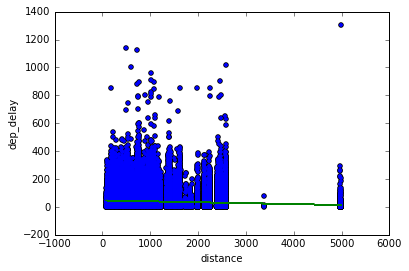

In [51]:
# For plotting inline
%matplotlib inline
dist_dep_delay = avg_dep_delay[['distance','dep_delay']]
# Scatterplot of Departure Delay Vs Distance travelled
dist_dep_delay.plot(kind='scatter', x='distance', y='dep_delay');
# Computing x and y values
x = avg_dep_delay['distance']
y = avg_dep_delay['dep_delay']
# Calculating slope and intercept for least square linear fit
m, b = np.polyfit(x, y, 1)
# Plotting least square fit
plt.plot(x, y, '.')
plt.plot(x, m*x + b, '-')

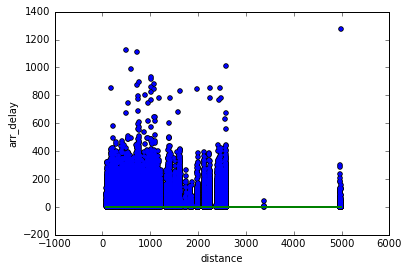

In [52]:
# For plotting inline
%matplotlib inline
dist_arr_delay = avg_arr_delay[['distance','arr_delay']]
# Scatterplot of Arrival Delay Vs Distance travelled
dist_arr_delay.plot(kind='scatter', x='distance', y='arr_delay');
# Computing x and y values
x = avg_arr_delay['distance']
y = avg_arr_delay['arr_delay']
# Calculating slope and intercept for least square linear fit
m, b = np.polyfit(x, y, 1)
# Plotting least square fit
plt.plot(x, y, '.')
plt.plot(x, m*x + b, '-')

 Research Question - Do longer distance flights have more delays than shorter distance flights?
 
Looking at the scatterplot for delays versus distance, we can see that the maximum delay is for the flight travelling longer distances. This is true for both departure and arrival delays. However least square polynomial fit shows a slight decrease for delays as we move from shorter distance flights to longer distance flights. 

### 

What weather conditions are associated with flight delays leaving NYC? Use graphics to explore.

In [53]:
# Reading weather data
weather = pd.read_csv('weather.csv')
# Merging flight and weather datasets
flights_weather = pd.merge(flights_df,weather,on=['year','month','day','hour','origin'], how='inner')

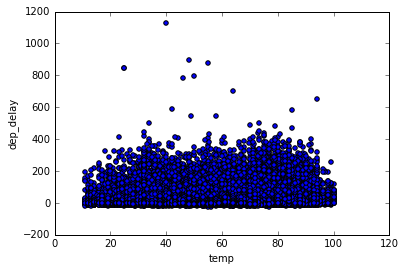

In [54]:
%matplotlib inline
# Scatterplot of Departure Delay Vs Temperature
flights_weather.plot(kind='scatter', x='temp', y='dep_delay');

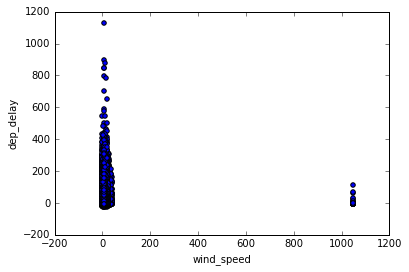

In [55]:
%matplotlib inline
# Scatterplot of Departure Delay Vs Wind Speed
flights_weather.plot(kind='scatter', x='wind_speed', y='dep_delay');

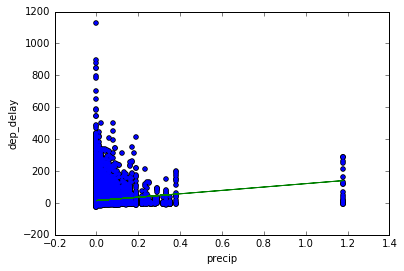

In [56]:
%matplotlib inline
# Scatterplot of Departure Delay Vs Precipitation
flights_weather.plot(kind='scatter', x='precip', y='dep_delay');
# Computing x and y values
x = flights_weather['precip']
y = flights_weather['dep_delay']
# Calculating slope and intercept for least square linear fit
m, b = np.polyfit(x, y, 1)
# Plotting least square fit
plt.plot(x, y, '.')
plt.plot(x, m*x + b, '-')

C:\Program Files\Anaconda2\lib\site-packages\numpy\lib\polynomial.py:594: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)


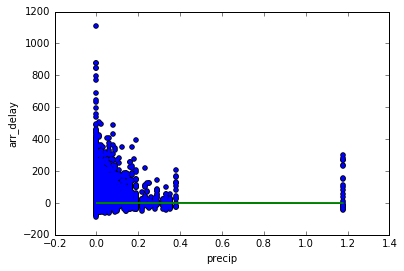

In [57]:
%matplotlib inline
# Scatterplot of Arrival Delay Vs Precipitation
flights_weather.plot(kind='scatter', x='precip', y='arr_delay');
# Computing x and y values
x = flights_weather['precip']
y = flights_weather['arr_delay']
# Calculating slope and intercept for least square linear fit
m, b = np.polyfit(x, y, 1)
# Plotting least square fit
plt.plot(x, y, '.')
plt.plot(x, m*x + b, '-')

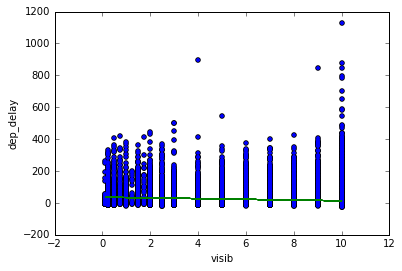

In [58]:
%matplotlib inline
# Scatterplot of Departure Delay Vs Visibility
flights_weather.plot(kind='scatter', x='visib', y='dep_delay');
# Computing x and y values
x = flights_weather['visib']
y = flights_weather['dep_delay']
# Calculating slope and intercept for least square linear fit
m, b = np.polyfit(x, y, 1)
# Plotting least square fit
plt.plot(x, y, '.')
plt.plot(x, m*x + b, '-')

C:\Program Files\Anaconda2\lib\site-packages\numpy\lib\polynomial.py:594: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)


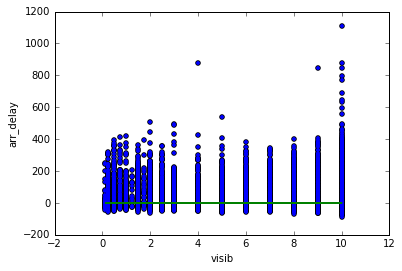

In [60]:
%matplotlib inline
# Scatterplot of Arrival Delay Vs Visibility
flights_weather.plot(kind='scatter', x='visib', y='arr_delay');
# Computing x and y values
x = flights_weather['visib']
y = flights_weather['arr_delay']
# Calculating slope and intercept for least square linear fit
m, b = np.polyfit(x, y, 1)
# Plotting least square fit
plt.plot(x, y, '.')
plt.plot(x, m*x + b, '-')

The scatterplot for departure delays with temperature and wind speed do not reveal any strong patterns. The scatterplot of departure delays Vs precipitation shows that the largest departure delays are for flights with 0 precipitation.

The maximum departure delays reduces as we move from 0 to 0.4 precipitation. However the maximum departure delays increase slightly for precipitation levels of 1.2. The least square line shows an increase in departure delays as precipitation increases. The least square fit between arrival delays and precipitation has a slope close to zero.

The scatterplot of departure delays Vs visibility in miles shows that the maximum departure delays happen when visibility is maximum (10 miles). However the least square line shows that as the visibility increases, the departure delay reduces slightly. The least square fit between arrival delays and visibility has a slope close to zero.